# Mean Reversion : A Beginner-Friendly Explanation

Mean reversion is a common concept used in finance, based on the idea that the price of an asset tends to return to its average over time. Simply put, if a price goes up or down too much, it's expected to eventually move back towrads its original average level. 

### The Basic Concept of Mean Reversion

1. Mean: The mean is the average price of a stock or asset over a certain period. For example, you could calculate the average price of a stock over the last 200 days - that would be its "mean price."
2. Reversion: Reversion means "returning." In mean reversion, the idea is that an asset's price will return or "revert" to the average price after deviating from it. 

### Assumptions of Mean Reversion 

Mean reversion is based on the following assumptions: 
- Asset prices have a tendecy to return to an average level over time.
- If the price moves far from the mean, either up or down, it will eventually move back towards the average.

### How to Calculate Mean Reversion

Calculating mean reversion is straightforward. You compute the average price of an asset, then compare the current price to see how far it deviates from that average.

###  Calculate the Average Price:
For example, to calculate the average price(moving average) of a stock over the last 50 days, you can use the following code: 

In [1]:
import pandas as pd
import yfinance as yf

# Downloading Apple stock data
ticker = 'AAPL'
data = yf.download(ticker, start='2021-10-23', end='2024-10-23')

# Calculate the 50-day moving average 
data['50_MA'] = data['Close'].rolling(window=50).mean()

# View the data
print(data[['Close', '50_MA']].tail())

[*********************100%%**********************]  1 of 1 completed
                 Close     50_MA
Date                            
2024-10-16  231.779999  224.6492
2024-10-17  232.149994  225.0958
2024-10-18  235.000000  225.5296
2024-10-21  236.479996  225.9344
2024-10-22  235.860001  226.3010


This code downloads Apple's stock data and calculates the 50-day moving average. The moving average helps us determine how far the current price has moved from its mean.

### Summary : 
- Mean reversion is the idea that asset prices tend to return to their average over time.
- If the price is above the average, it might be a signal to sell. If the price is below the average, it could be a signal to buy. 
- You can use moving averages to calculate the mean price and compare the current price to detect outliers.
- However, mean reversion doesn't always apply, and new market trends may caues price to break away from histrocial averages.

## Mean Reversion Stategy Example: Moving Average Convergence

In this example, we'll use a dual moving average strategy. The idea is to:
- <b>Buy</b> When the short-term moving average(e.g., 20-day) crosses below a long-term moving average(e.g., 100-day). This implies the stock might be undervalued.
- <b>Sell</b> When the short-temr moving average crosses above the long-term moving average. This suggests the stock might be overvalue.

### 1. Data Download & Moving Average Calculation

We'll first download historical stock data and calculate two moving averages: the shortp-term (20-day) and long-term(100-day)

[*********************100%%**********************]  1 of 1 completed


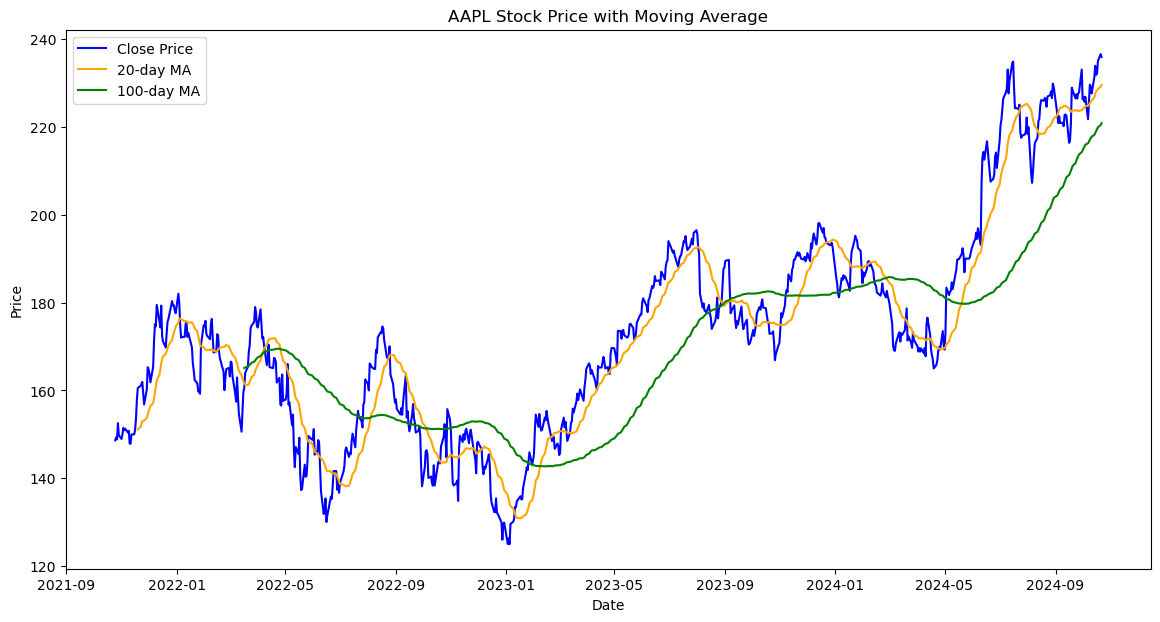

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical data for a stock(Apple in this case)
ticker = 'AAPL'
data = yf.download(ticker, start='2021-10-23', end='2024-10-23')

data['20_MA'] = data['Close'].rolling(window=20).mean()
data['100_MA'] = data['Close'].rolling(window=100).mean()

# Plot the closing price and moving average for visualization 
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['20_MA'], label='20-day MA', color='orange')
plt.plot(data['100_MA'], label='100-day MA', color='green')
plt.title(f'{ticker} Stock Price with Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### 2m Implement the Mean Reversion Stategy
The basic rules are:
- Buy Signal: When the short-term moving average crosses below the long-term moving average.
- Sell Signal: When the short-term moving average crosses above the long-term moving average.

[*********************100%%**********************]  1 of 1 completed
                 Close    20_MA      100_MA  Signal  Position
Date                                                         
2022-12-23  123.150002  165.201  234.019467       1       1.0
2022-12-27  109.099998  161.510  232.024134       1       1.0
2022-12-28  112.709999  158.104  230.269534       1       1.0
2022-12-29  121.820000  154.460  228.583501       1       1.0
2022-12-30  123.180000  150.884  226.981967       1       1.0


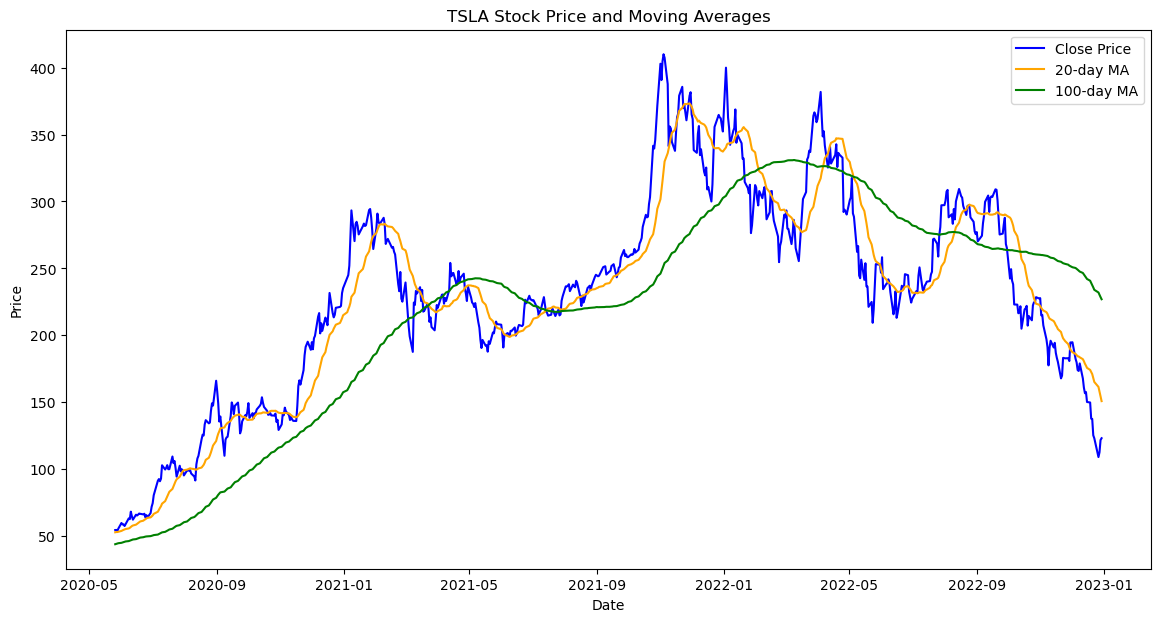

In [15]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for Apple
ticker = 'TSLA'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Calculate the 20-day and 100-day moving averages
data['20_MA'] = data['Close'].rolling(window=20).mean()
data['100_MA'] = data['Close'].rolling(window=100).mean()

# Drop rows where we don't have both moving averages (to align data)
data.dropna(subset=['20_MA', '100_MA'], inplace=True)

# Create signals: 1 for buy, -1 for sell, 0 for hold
data['Signal'] = 0
data.loc[data['20_MA'] < data['100_MA'], 'Signal'] = 1  # Buy signal
data.loc[data['20_MA'] > data['100_MA'], 'Signal'] = -1  # Sell signal

# Shift the signal column to prevent future-looking bias
data['Position'] = data['Signal'].shift()

# Print the last few rows to verify
print(data[['Close', '20_MA', '100_MA', 'Signal', 'Position']].tail())

# Optional: Plot the signals and moving averages
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['20_MA'], label='20-day MA', color='orange')
plt.plot(data['100_MA'], label='100-day MA', color='green')
plt.title(f'{ticker} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


### 3. Backtest the Strategy 

[*********************100%%**********************]  1 of 1 completed


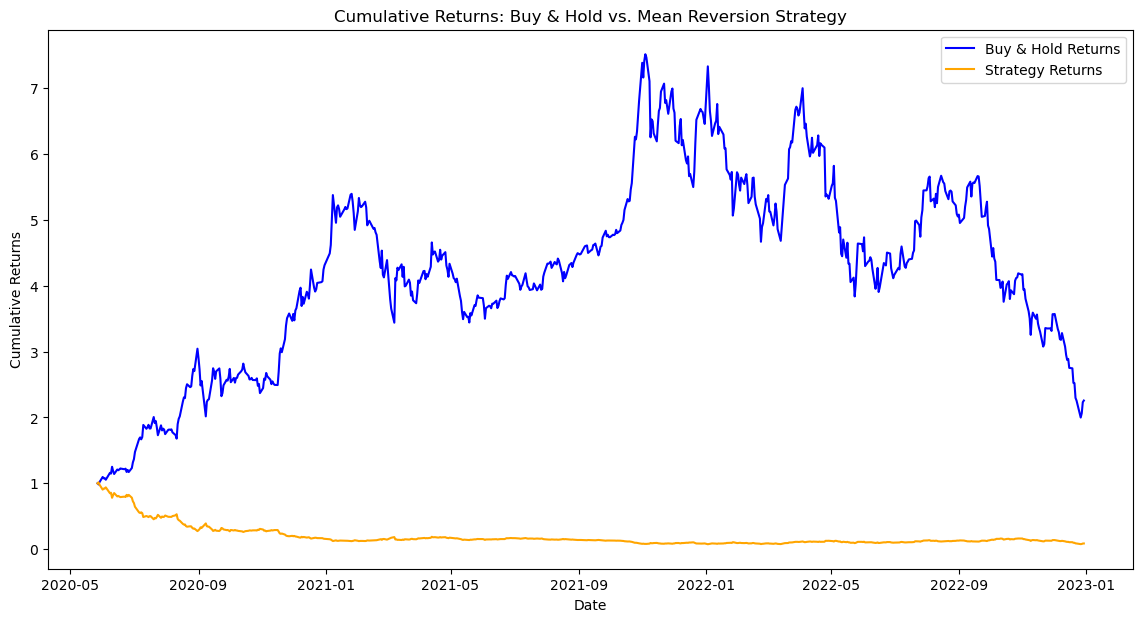

                 Close    20_MA      100_MA  Signal  Position  Market_Returns  \
Date                                                                            
2022-12-23  123.150002  165.201  234.019467       1       1.0       -0.017551   
2022-12-27  109.099998  161.510  232.024134       1       1.0       -0.114089   
2022-12-28  112.709999  158.104  230.269534       1       1.0        0.033089   
2022-12-29  121.820000  154.460  228.583501       1       1.0        0.080827   
2022-12-30  123.180000  150.884  226.981967       1       1.0        0.011164   

            Strategy_Returns  
Date                          
2022-12-23         -0.017551  
2022-12-27         -0.114089  
2022-12-28          0.033089  
2022-12-29          0.080827  
2022-12-30          0.011164  


In [27]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for a stock (Apple in this case)
ticker = 'TSLA'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Calculate the short-term (20-day) and long-term (100-day) moving averages
data['20_MA'] = data['Close'].rolling(window=20).mean()
data['100_MA'] = data['Close'].rolling(window=100).mean()

# Drop rows where moving averages are NaN (since we can't compare them until both exist)
data.dropna(subset=['20_MA', '100_MA'], inplace=True)

# Create signals: 1 for buy, -1 for sell, 0 for hold
data['Signal'] = 0
data.loc[data['20_MA'] < data['100_MA'], 'Signal'] = 1  # Buy signal
data.loc[data['20_MA'] > data['100_MA'], 'Signal'] = -1  # Sell signal

# Shift the signal column by one period to prevent future-looking bias
data['Position'] = data['Signal'].shift()

# Calculate daily returns based on closing price percentage change
data['Market_Returns'] = data['Close'].pct_change()

# Calculate strategy returns: market returns times the position
# Position determines if we're holding (1 for buy, -1 for sell)
data['Strategy_Returns'] = data['Market_Returns'] * data['Position']

# Calculate cumulative returns for both the strategy and a buy-and-hold approach
data['Cumulative_Market_Returns'] = (1 + data['Market_Returns']).cumprod()
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative_Market_Returns'], label='Buy & Hold Returns', color='blue')
plt.plot(data['Cumulative_Strategy_Returns'], label='Strategy Returns', color='orange')
plt.title('Cumulative Returns: Buy & Hold vs. Mean Reversion Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Display the first few rows of data
print(data[['Close', '20_MA', '100_MA', 'Signal', 'Position', 'Market_Returns', 'Strategy_Returns']].tail())
